In [1]:
import numpy as np
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp
import functools
import pickle
from operator import add
import uncertainty_toolbox as uct
import matplotlib as mpl
from wazy.utils import *
from wazy.mlp import *
from jax_unirep import get_reps
import wazy
import os
import sq
%matplotlib inline

#mpl.rcParams.update(mpl.rcParamsDefault)

In [2]:
def current_best(ys):
    curr_best = [ys[0]]
    for i, y in enumerate(ys):
        if i == 0:
            continue
        curr_best.append(max(ys[:i]))
    return curr_best

(100,)
[1.3337526 1.3337526 1.4608783 1.5688285 1.6576031 1.6647052 1.6860112
 1.7016356 1.7243619 1.7577415 1.7783372 1.7861493 1.7953819 1.8188183
 1.8223693 1.8308917 1.8394142 1.8408345 1.8450956 1.8450956 1.846516
 1.8536181 1.8578793 1.8656915 1.8685323 1.8685323 1.8749242 1.8820261
 1.8912586 1.8948096 1.9054625 1.9061726 1.910434  1.9111441 1.9111441
 1.9154053 1.9203765 1.9239277 1.9274784 1.940262  1.9473641 1.9587272
 1.9629886 1.9672498 1.9708006 1.9743516 1.9757721 1.9771925 1.9779029
 1.9779029 1.9779029 1.9871352 1.9913964 1.993527  2.0063107 2.010572
 2.0134127 2.0176737 2.0269065 2.029037  2.029037  2.036139  2.036139
 2.036139  2.0382698 2.0382698 2.0382698 2.03969   2.0404    2.0453713
 2.0453713 2.0453713 2.0496325 2.0503428 2.0517633 2.0517633 2.0517633
 2.0517633 2.0553143 2.0560246 2.0560246 2.0560246 2.060996  2.060996
 2.060996  2.060996  2.0659673 2.0659673 2.0659673 2.0695183 2.0709386
 2.0709386 2.0716488 2.0716488 2.0716488 2.0716488 2.0737796 2.0737796
 2.

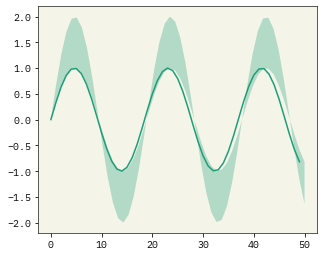

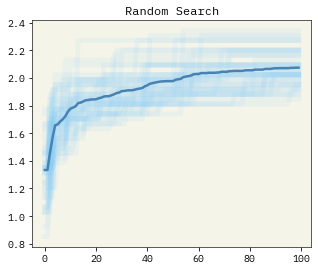

In [8]:
x = np.linspace(0,50,50)
y1 = np.sin(1/3*x)
y2 = 2* np.sin(1/3*x)
plt.figure(1)
ax = plt.gca()
ax.plot(y1)
#ax.plot(y2)
ax.fill_between(x, y1, y2, alpha=0.3)

y_random = []
for i in range(50):
    with open('random_result/y{0}.pkl'.format(i), 'rb') as f:
        y_random.append(current_best(pickle.load(f)))
y_random = np.array(y_random)
y_random_q = np.quantile(y_random, 1/3, axis=0)
print(y_random_q.shape)
y_random_median = np.mean(y_random, axis=0)
plt.figure()
ax = plt.gca()
y_random_mean = y_random[0]
for i in range(1,50):
    #y_random_mean = list(map(add, y_random[i], y_random_mean))
    ax.plot(y_random[i], alpha=0.1, linewidth=5, color='lightskyblue')
#y_random_mean = [y_m/100 for y_m in y_random_mean]
for i in range(0, 5):
    q = 0.2 + 0.8 / 5 * i
    qt = np.quantile(y_random, q, axis=0)
    #ax.plot(qt, alpha=0.0)
    #ax.fill_between(np.linspace(0,50,50), qt, y_random_mean, alpha=0.3, color='powderblue')
plt.plot(y_random_median, color='steelblue', linewidth=2.5)
plt.title('Random Search')
print(y_random_median)

2.4352708


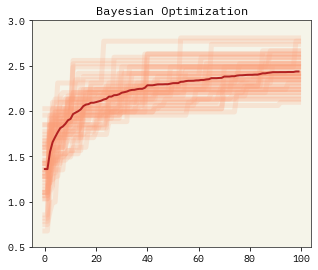

In [9]:
plt.figure()   
ax = plt.gca()    
y_bo = []
for i in range(50):
    with open('./result_e2e_bo/labels_0503_lite/y_{0}.pkl'.format(i), 'rb') as f:
        curr = current_best(pickle.load(f))
        y_bo.append(curr)
        ax.plot(curr, alpha=0.2, color='lightsalmon', linewidth=5)
y_bo = np.array(y_bo)

y_bo_median = np.mean(y_bo, axis=0)
y_bo_max = np.max(y_bo, axis=0)
y_bo_min = np.min(y_bo, axis=0)
#for i in range(1,32):
    #y_grad_1_mean = list(map(add, current_best(y_grad_1[i]), y_grad_1_mean))
#y_grad_1_mean = [y_m/32 for y_m in y_grad_1_mean] 
ax.plot(y_bo_median, linewidth=2, color='firebrick')
ax.set_title('Bayesian Optimization')
ax.set_ylim([0.5, 3.0])
print(y_bo_median[-1])

2.3983402


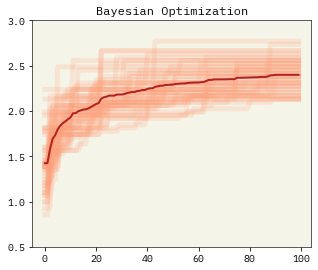

In [10]:
plt.figure()   
ax = plt.gca()    
y_bo = []
for i in range(50):
    with open('./result_e2e_bo/labels_0510_swish/y_{0}.pkl'.format(i), 'rb') as f:
        curr = current_best(pickle.load(f))
        y_bo.append(curr)
        ax.plot(curr, alpha=0.2, color='lightsalmon', linewidth=5)
y_bo = np.array(y_bo)

y_bo_median = np.mean(y_bo, axis=0)
y_bo_max = np.max(y_bo, axis=0)
y_bo_min = np.min(y_bo, axis=0)
#for i in range(1,32):
    #y_grad_1_mean = list(map(add, current_best(y_grad_1[i]), y_grad_1_mean))
#y_grad_1_mean = [y_m/32 for y_m in y_grad_1_mean] 
ax.plot(y_bo_median, linewidth=2, color='firebrick')
ax.set_title('Bayesian Optimization')
ax.set_ylim([0.5, 3.0])
print(y_bo_median[-1])

2.1455097


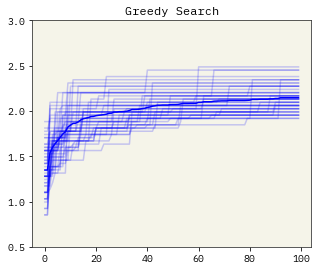

In [11]:
plt.figure()
ax = plt.gca()
y_grad = []
for i in range(50):
    with open('result_e2e_grad/labels/y_{0}.pkl'.format(i), 'rb') as f:
        curr = current_best(pickle.load(f))
        y_grad.append(curr)
        ax.plot(curr, alpha = 0.2, color='b')

y_grad_mean = current_best(y_grad[0])
y_grad = np.array(y_grad)
y_grad_median = np.mean(y_grad, axis=0)
y_grad_max = np.max(y_grad, axis=0)
y_grad_min = np.min(y_grad, axis=0)
#for i in range(1,7):             
    #y_15_mean = list(map(add, current_best(y_15[i]), y_15_mean))
#y_15_mean = [y_m/7 for y_m in y_15_mean] 
ax.plot(y_grad_median, color='b')
ax.set_ylim([0.5, 3.0])
ax.set_title('Greedy Search')
print(y_grad_median[-1])
#plt.plot(current_best(y_15[2]))

In [4]:
def current_best_idx(ys):
    curr_best = [ys[0]]
    idx = [0]
    for i, y in enumerate(ys):
        if i == 0:
            continue
        if y > curr_best[-1]:
            idx.append(i)
        curr_best.append(max(ys[:i]))
    return idx, curr_best

def semi_current_best(ys, idx):
    curr_best = [ys[0]]
    curr = [ys[0]]
    for i, y in enumerate(ys):
        if i in idx:
            curr = ys[i]
            curr_best.append(curr)
            continue
        curr_best.append(curr)
        
    return curr_best
    

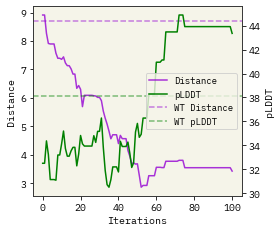

In [7]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import urllib.request
%matplotlib inline
urllib.request.urlretrieve('https://github.com/google/fonts/raw/main/ofl/ibmplexmono/IBMPlexMono-Regular.ttf', 'IBMPlexMono-Regular.ttf')
fe = font_manager.FontEntry(
    fname='IBMPlexMono-Regular.ttf',
    name='plexmono')
font_manager.fontManager.ttflist.append(fe)
plt.rcParams.update({'axes.facecolor':'#f5f4e9', 
            'grid.color' : '#AAAAAA', 
            'axes.edgecolor':'#333333', 
            'figure.facecolor':'#FFFFFF', 
            'axes.grid': False,
            'axes.prop_cycle':   plt.cycler('color', plt.cm.Dark2.colors),
            'font.family': fe.name,
            'figure.figsize': (4,4 / 1.2),
            'ytick.left': True,
            'xtick.bottom': True,
            'legend.loc':'center right'
           })

plt.figure()
ax1 = plt.gca()

ax2 = ax1.twinx()

dist = []
plddt = []
'''

with open('result_af/labels_conf_0615/y_0.pkl'.format(i), 'rb') as f:
    curr = pickle.load(f)
    curr_best = current_best(curr)
    #y_grad_noise.append(curr)
ax.plot(curr, alpha = 0.5)
ax.plot(curr_best, alpha = 1)
'''
#for i in [0,2,3,6,7,8,11,12,13,14]:
for i in range(5,10):
    number_str = str(i)
    text_i = number_str.zfill(2)
    #with open('result_af/output_0628/y_{0}.pkl'.format(text_i), 'rb') as f:
    with open('result_af/output_0712/y_{0}.pkl'.format(text_i), 'rb') as f:
        curr = pickle.load(f)
        #print(len(curr[0]))
        np_curr = np.array(curr)
        idx, curr_best = current_best_idx(np_curr[:, 2])
        curr_best_dist = semi_current_best(np_curr[:, 0], idx)
        dist.append(curr_best_dist)
        curr_best_plddt = semi_current_best(np_curr[:, 1], idx)
        plddt.append(curr_best_plddt)
        
        #ax1.plot(curr_best_dist, alpha = 0.5, color='plum')
        #ax2.plot(curr_best_plddt, alpha=0.2, color='green')
#ax.plot(curr_best, alpha = 1)
''' 
y_grad_mean_noise = current_best(y_grad_noise[0])
y_grad_noise = np.array(y_grad_noise)
y_grad_median_noise = np.median(y_grad_noise, axis=0)
y_grad_max_noise = np.max(y_grad_noise, axis=0)
y_grad_min_noise = np.min(y_grad_noise, axis=0)
#for i in range(1,7):             
    #y_15_mean = list(map(add, current_best(y_15[i]), y_15_mean))
#y_15_mean = [y_m/7 for y_m in y_15_mean] 
ax.plot(y_grad_median_noise, color='b')
'''
dist_mean = np.mean(dist, axis=0)
plddt_mean = np.mean(plddt, axis=0)
#ax.plot([e * -1 for e in y_grad_median_noise], color='darkviolet', alpha=0.8)
l1, = ax1.plot(dist_mean, color='darkviolet', alpha=0.8, label="df")
l3 = ax1.axhline(y=8.7, color='darkviolet', linestyle='--', alpha=0.5, label="wild type distance")
l2, = ax2.plot(plddt_mean, color='green', label="sdf")
l4 = ax2.axhline(y=38.15, color='green', linestyle='--', alpha=0.5, label="wild type pLDDT")
#ax.set_ylim([0.5, 3.0])
#ax1.set_title('Alphafold')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Distance')
ax2.set_ylabel('pLDDT')

#plt.rcParams["legend.loc"] = 'best'
#ax1.axhline(y=8.7, color='darkviolet', linestyle='--', alpha=0.5, label="wild type distance")
#ax2.axhline(y=38.15, color='green', linestyle='--', alpha=0.5, label="wild type pLDDT")
plt.tight_layout()
plt.legend([l1, l2, l3,l4], ['Distance', 'pLDDT', 'WT Distance', 'WT pLDDT'], prop={'size': 9})
plt.tight_layout()
#plt.legend([l1, l2], ["Distance", "pLDDT", "wild type distance"])
plt.savefig('af-flex.png', dpi=300)
#print(y_grad_median_noise[-1])
#plt.plot(current_best(y_15[2]))

In [21]:
1-15.13*0.9*0.1

-0.36170000000000013

2.6589832


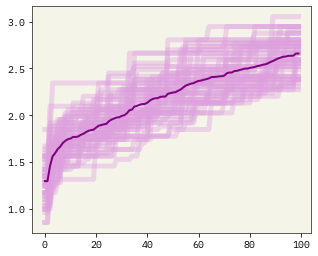

In [12]:
plt.figure()
ax = plt.gca()
y_ohc = []
for i in range(50):
    with open('result_e2e_ohc/labels/y_{0}.pkl'.format(i), 'rb') as f:
        #print(pickle.load(f))
        curr = current_best(pickle.load(f))
        y_ohc.append(curr)
        ax.plot(curr, alpha=0.4, linewidth=5, color='plum')
y_ohc = np.array(y_ohc)
y_ohc_median = np.mean(y_ohc, axis=0)
y_ohc_max = np.max(y_ohc, axis=0)
y_ohc_min = np.min(y_ohc, axis=0)
ax.plot(y_ohc_median, color='purple', linewidth=2)
print(y_ohc_median[-1])

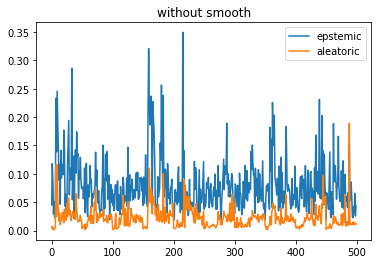

In [29]:
eps1 = []
als = []
plt.figure()
for i in range(10):
    with open('result_neat/uncertainty/epi_ale_{0}.pkl'.format(i), 'rb') as f3:
        eas = pickle.load(f3)
        for ea in eas:
            e, a = ea
            eps1.append(e)
            als.append(a)
plt.plot(eps1, label='epstemic')
plt.plot(als, label='aleatoric')
plt.title('without smooth')
plt.legend()

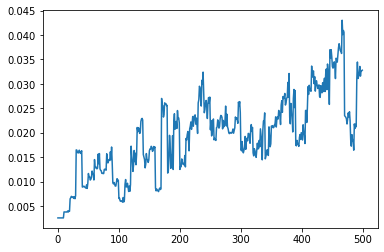

In [28]:
vals = []
plt.figure()
for i in range(1):
    with open('result_smooth/yhats_val/yhat_val_{0}.pkl'.format(i), 'rb') as f3:
        yhats = pickle.load(f3)
        for yhat in yhats:
            val = []
            for y in yhat:
                val.append(y[1])
            vals.append(val)
vals = np.array(vals)
vals = vals.flatten()
#print(len(vals))            
plt.plot(vals, label='epstemic')

#plt.title('without smooth')
#plt.legend()

In [6]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import urllib.request

urllib.request.urlretrieve('https://github.com/google/fonts/raw/main/ofl/ibmplexmono/IBMPlexMono-Regular.ttf', 'IBMPlexMono-Regular.ttf')
fe = font_manager.FontEntry(
    fname='IBMPlexMono-Regular.ttf',
    name='plexmono')
font_manager.fontManager.ttflist.append(fe)
plt.rcParams.update({'axes.facecolor':'#f5f4e9', 
            'grid.color' : '#AAAAAA', 
            'axes.edgecolor':'#333333', 
            'figure.facecolor':'#FFFFFF', 
            'axes.grid': False,
            'axes.prop_cycle':   plt.cycler('color', plt.cm.Dark2.colors),
            'font.family': fe.name,
            'figure.figsize': (5,5 / 1.2),
            'ytick.left': True,
            'xtick.bottom': True   
           })

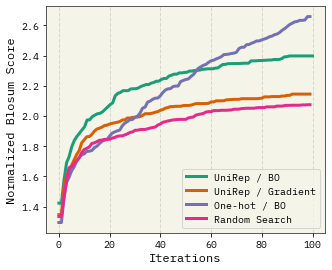

In [14]:
x = np.linspace(0,100,100)
plt.plot(x, y_bo_median, label='UniRep / BO',linewidth=3)
plt.plot(y_grad_median, label='UniRep / Gradient',linewidth=3)
plt.plot(y_ohc_median, label='One-hot / BO',linewidth=3)
plt.plot(y_random_median, label='Random Search', linewidth=3)
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('Normalized Blosum Score', fontsize=12)
plt.grid(which='major', axis='x', zorder=-1.0, linewidth=1, alpha=0.4, linestyle='dashed')
plt.title('')
plt.rcParams["legend.loc"] = 'lower right'
plt.legend()
#plt.box(False)
plt.savefig('line.png', dpi=300)
#plt.rcParams["figure.figsize"] = (8,6)

2.3827162
2.1959333
2.3699331
2.1561627


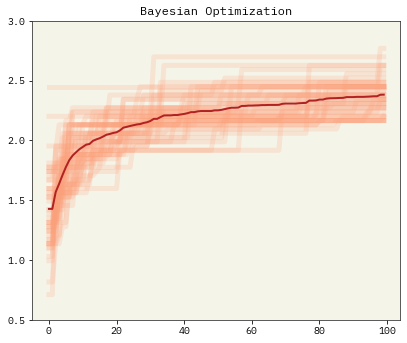

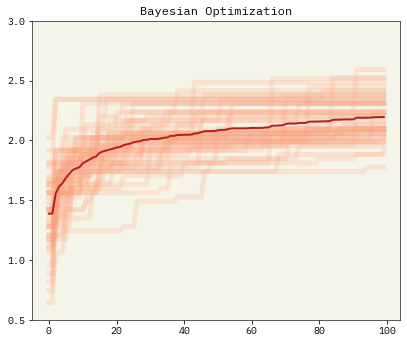

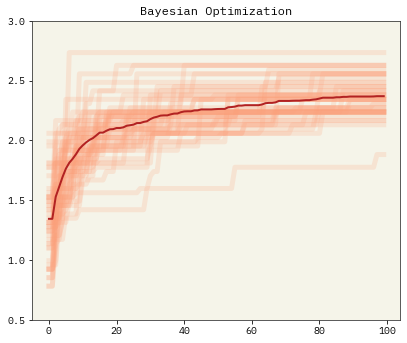

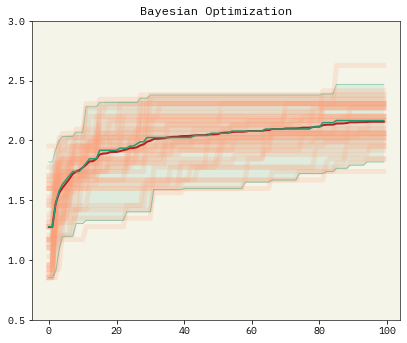

In [31]:
plt.figure()   
ax = plt.gca()    
y_bo_no = []
for i in range(50):
    with open('./result_e2e_bo/labels_0427_nonoise/y_{0}.pkl'.format(i), 'rb') as f:
        curr = current_best(pickle.load(f))
        y_bo_no.append(curr)
        ax.plot(curr, alpha=0.2, color='lightsalmon', linewidth=5)
y_bo_no = np.array(y_bo_no)

y_bo_no_median = np.mean(y_bo_no, axis=0)
y_bo_no_max = np.max(y_bo_no, axis=0)
y_bo_no_min = np.min(y_bo_no, axis=0)
#for i in range(1,32):
    #y_grad_1_mean = list(map(add, current_best(y_grad_1[i]), y_grad_1_mean))
#y_grad_1_mean = [y_m/32 for y_m in y_grad_1_mean] 
ax.plot(y_bo_no_median, linewidth=2, color='firebrick')
ax.set_title('Bayesian Optimization')
ax.set_ylim([0.5, 3.0])
print(y_bo_no_median[-1])

plt.figure()   
ax = plt.gca()    
y_bo_noise = []
for i in range(50):
    with open('./result_e2e_bo/labels_0425/y_{0}.pkl'.format(i), 'rb') as f:
        curr = current_best(pickle.load(f))
        y_bo_noise.append(curr)
        ax.plot(curr, alpha=0.2, color='lightsalmon', linewidth=5)
y_bo_noise = np.array(y_bo_noise)

y_bo_noise_median = np.mean(y_bo_noise, axis=0)
y_bo_noise_max = np.max(y_bo_noise, axis=0)
y_bo_noise_min = np.min(y_bo_noise, axis=0)
#for i in range(1,32):
    #y_grad_1_mean = list(map(add, current_best(y_grad_1[i]), y_grad_1_mean))
#y_grad_1_mean = [y_m/32 for y_m in y_grad_1_mean] 
ax.plot(y_bo_noise_median, linewidth=2, color='firebrick')
ax.set_title('Bayesian Optimization')
ax.set_ylim([0.5, 3.0])
print(y_bo_noise_median[-1])

plt.figure()   
ax = plt.gca()    
y_bo_mid = []
for i in range(50):
    with open('./result_e2e_bo/labels_0427/y_{0}.pkl'.format(i), 'rb') as f:
        curr = current_best(pickle.load(f))
        y_bo_mid.append(curr)
        ax.plot(curr, alpha=0.2, color='lightsalmon', linewidth=5)
y_bo_mid = np.array(y_bo_mid)

y_bo_mid_median = np.mean(y_bo_mid, axis=0)
y_bo_mid_max = np.max(y_bo_mid, axis=0)
y_bo_mid_min = np.min(y_bo_mid, axis=0)
#for i in range(1,32):
    #y_grad_1_mean = list(map(add, current_best(y_grad_1[i]), y_grad_1_mean))
#y_grad_1_mean = [y_m/32 for y_m in y_grad_1_mean] 
ax.plot(y_bo_mid_median, linewidth=2, color='firebrick')
ax.set_title('Bayesian Optimization')
ax.set_ylim([0.5, 3.0])
print(y_bo_mid_median[-1])

plt.figure()   
ax = plt.gca()    
y_bo_noad = []
for i in range(50):
    with open('./result_e2e_bo/labels_0510_bignoise_noad/y_{0}.pkl'.format(i), 'rb') as f:
        curr = current_best(pickle.load(f))
        y_bo_noad.append(curr)
        ax.plot(curr, alpha=0.2, color='lightsalmon', linewidth=5)
y_bo_noad = np.array(y_bo_noad)

y_bo_noad_median = np.mean(y_bo_noad, axis=0)
y_bo_noad_max = np.max(y_bo_noad, axis=0)
y_bo_noad_min = np.min(y_bo_noad, axis=0)
#for i in range(1,32):
    #y_grad_1_mean = list(map(add, current_best(y_grad_1[i]), y_grad_1_mean))
#y_grad_1_mean = [y_m/32 for y_m in y_grad_1_mean] 
ax.plot(y_bo_noad_median, linewidth=2, color='firebrick')
ax.set_title('Bayesian Optimization')
ax.set_ylim([0.5, 3.0])
print(y_bo_noad_median[-1])


sq.traj_quantile(y_bo_noad)

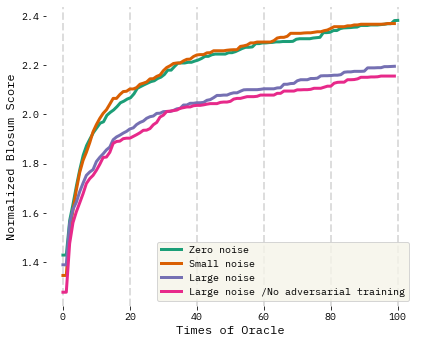

In [32]:
x = np.linspace(0,100,100)

plt.plot(x, y_bo_no_median, label='Zero noise',linewidth=3)
plt.plot(y_bo_mid_median, label='Small noise',linewidth=3)
plt.plot(y_bo_noise_median, label='Large noise',linewidth=3)
plt.plot(y_bo_noad_median, label='Large noise /No adversarial training',linewidth=3)
'''
sq.traj_quantile(y_bo_no, color='red',alpha=0.03, means=True)
sq.traj_quantile(y_bo_mid, color='green',alpha=0.03, means=True)
sq.traj_quantile(y_bo_noise, color='orange',alpha=0.03, means=True)
sq.traj_quantile(y_bo_noad,alpha=0.03, means=True)
'''



plt.xlabel('Times of Oracle', fontsize=12)
plt.ylabel('Normalized Blosum Score', fontsize=12)
plt.grid(which='major', axis='x', zorder=-1.0, linewidth=2, alpha=0.4, linestyle='dashed')
plt.title('')
plt.legend()
plt.box(False)
#plt.rcParams["figure.figsize"] = (10,6)

## Uncertainty-toolbox

In [3]:
#uct.viz.set_style()
uct.viz.update_rc("text.usetex", True)  # Set to True for system latex
#uct.viz.update_rc("font.size", 14)  # Set font size
#uct.viz.update_rc("xtick.labelsize", 14)  # Set font size for xaxis tick labels
#uct.viz.update_rc("ytick.labelsize", 14)  # Set font size for yaxis tick labels

np.random.seed(11)


#ax.figure=fig2
#fig2.axes.append(ax)
#fig2.add_axes(ax)

def make_plots(pred_mean, pred_std, y, ax, plot_save_str="row"):
    """Make set of plots."""
    #plt.figure()
    ax = uct.plot_calibration(pred_mean, pred_std, y, ax=ax)
    ax.set_title('')
    #return fig

In [9]:
AA_list = ['A','R','N','D','C','Q','E','G','H','I','L','K','M','F','P','S','T','W','Y','V','B','Z','X','*']
blosum62 = np.loadtxt("./blosum62.txt", dtype='i', delimiter=' ')

min62 = jnp.min(blosum62)
blosum62 = blosum62 - min62
avg62 = jnp.sum(blosum62)/24/24
#(blosum62 - jnp.min(blosum62)) / (jnp.max(blosum62) - jnp.min(blosum62))
sum62 = 0.
for row in blosum62:
    for aa in row:
        sum62 += (aa-avg62)**2
std62 = jnp.sqrt(sum62 / 24/24)

def blosum(seq1, seq2):
    seqlist1 = list(seq1)
    seqlist2 = list(seq2)
    score = 0.
    for i in range(len(seqlist1)):
        idx1 = AA_list.index(seqlist1[i])
        idx2 = AA_list.index(seqlist2[i])
        score += blosum62[idx1][idx2]/std62
        #jax.nn.sigmoid(score/len(seqlist1))
    return score/len(seqlist1)

def get_blosum_labels(seqs):
    labels = []
    for seq in seqs:
        labels.append(blosum(target_seq, seq))
    labels = np.array(labels)

    return labels

def get_results(key, params, rep_list):
    means = []
    stds = []
    for rep in rep_list:
        yhat = model.infer_t.apply(params, key, rep, training=False)
        means.append(yhat[0])
        stds.append(jnp.sqrt(yhat[1]))
    return np.array(means), np.array(stds)

def parity_plot(yhat, test_y, std, ax):
    #fig = plt.figure()
    ax.scatter(test_y, yhat, alpha=0.2, color='C1')
    ax.errorbar(test_y, yhat, yerr=std, fmt='None', alpha=0.1, ecolor='C1')
    ax.plot( [0.6,2.3],[0.6,2.3], linewidth=2, linestyle='dashed')
    
    ax.set_xlim([0.6, 2.3])
    ax.set_ylim([0.6, 2.3])
    ax.set_xlabel('Ground truth')
    #ax.set_ylabel('Predictions')
    ax.text(
    min(test_y) + 0.1,
    max(test_y) - 0.2,
    f"correlation = {np.corrcoef(test_y, yhat)[0,1]:.3f}",
    )
    ax.text(
    min(test_y) + 0.1,
    max(test_y) - 0.3,
    
    f"log likelihood = {-np.mean((0.5*np.log(std**2) + (test_y - yhat)**2)/(2*std**2) + 0.5 * np.log(2 * np.pi)):.3f}",
    )
    
    
def parity_plot2(yhat, test_y, std):
    #fig = plt.figure()
    plt.scatter(test_y, yhat, alpha=0.3, color='C0')
    plt.errorbar(test_y, yhat, yerr=std, fmt='None', alpha=0.2, color='C4')
    plt.plot( [0.6,2.3],[0.6,2.3], linewidth=2, linestyle='dashed', color='C4')
    
    plt.xlim([0.6, 2.3])
    plt.ylim([0.6, 2.3])
    plt.xlabel('Ground truth')
    #plt.ylabel('Predictions')
    plt.text(
    0.6 + 0.1,
    2.3 - 0.2,
    f"correlation = {np.corrcoef(test_y, yhat)[0,1]:.3f}",
    )
    plt.text(
    0.6 + 0.1,
    2.3 - 0.3,
    f"log likelihood = {-np.mean((0.5*np.log(std**2) + (test_y - yhat)**2)/(2*std**2) + 0.5 * np.log(2 * np.pi)):.3f}",
    )
    
    

In [18]:
target_seq = 'TARGETPEPTIDE'
with open('../10kseqs.txt') as f:
    readfile = f.readlines()
    random_seqs = f'{readfile[0]}'.split(' ')[:-1]
test_seqs = [random.choice(random_seqs) for i in range(250)]
test_reps = get_reps(test_seqs)[0]
test_labels = get_blosum_labels(test_seqs)

In [ ]:
params = []
for i in range(50):
    # 0427
    with open('result_e2e_bo/params_0510_swish/params_{0}.pkl'.format(i), 'rb') as f:
        params.append(pickle.load(f))

In [17]:
pred_list100 = []
std_list100 = []
y100 = []
pred_list10 = []
std_list10 = []
y10 = []
pred_list50 = []
std_list50 = []
y50 = []
for i in range(50):
    with open('result_e2e_bo/predict_0510_swish/yhat_{}.pkl'.format(i), 'rb') as f1:
        data1 = pickle.load(f1)
        pred_list100.extend(data1[99][0][:-1])
        pred_list50.extend(data1[49][0][:-1])
        pred_list10.extend(data1[9][0][:-1])
    with open('result_e2e_bo/predict_0510_swish/yhat_{}.pkl'.format(i), 'rb') as f1:
        data1 = pickle.load(f1)
        std_list100.extend(data1[99][1][:-1])
        std_list50.extend(data1[49][1][:-1])
        std_list10.extend(data1[9][1][:-1])
    with open('result_e2e_bo/labels_0510_swish/y_{}.pkl'.format(i), 'rb') as f3:
        data3 = pickle.load(f3)
        y100.extend(data3)
        y50.extend(data3[:50])
        y10.extend(data3[:10])
    

In [8]:
print(np.array(std_list10).shape)

(500,)


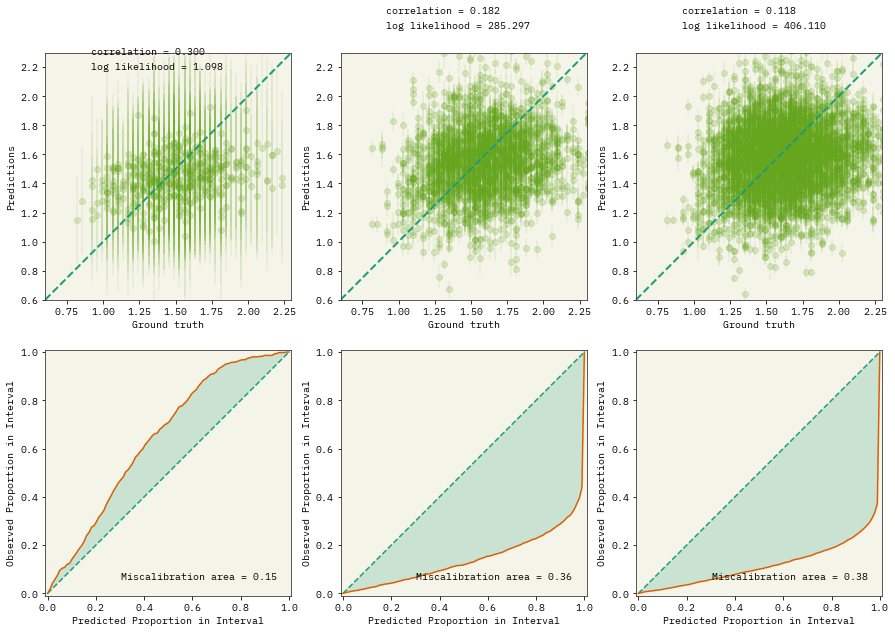

In [34]:
import matplotlib.pyplot as plt 
import matplotlib as mpl
%matplotlib inline
#mpl.rcParams.update(mpl.rcParamsDefault)


fig, axs = plt.subplots(2, 3, figsize=(15,10))
parity_plot(np.array(pred_list10), np.array(y10), np.array(std_list10), axs[0, 0])
parity_plot(np.array(pred_list50), np.array(y50), np.array(std_list50), axs[0, 1])
parity_plot(np.array(pred_list100), np.array(y100), np.array(std_list100), axs[0, 2])

make_plots(np.array(pred_list10), np.array(std_list10), np.array(y10), axs[1, 0])
make_plots(np.array(pred_list50), np.array(std_list50), np.array(y50), axs[1, 1])
make_plots(np.array(pred_list100), np.array(std_list100), np.array(y100), axs[1, 2])

In [15]:
c = wazy.EnsembleBlockConfig()
aconfig = AlgConfig()
c.shape = (
        #128,
        64,
        #32,
        16,
        2,)
c.dropout=0.2
c.model_number = 5
aconfig.train_epochs = 10
aconfig.train_lr = 1e-4
aconfig.b0_xi = 2.0
aconfig.bo_batch_size = 8
aconfig.train_resampled_classes = 10
model = wazy.EnsembleModel(c)
target_seq = 'TARGETPEPTIDE'

means10, stds10 = get_results(jax.random.PRNGKey(0), params[29][9], test_reps)
means50, stds50 = get_results(jax.random.PRNGKey(0), params[29][49], test_reps)
means100, stds100 = get_results(jax.random.PRNGKey(0), params[29][99], test_reps)

Text(0, 0.5, 'Observed Proportion in Interval')

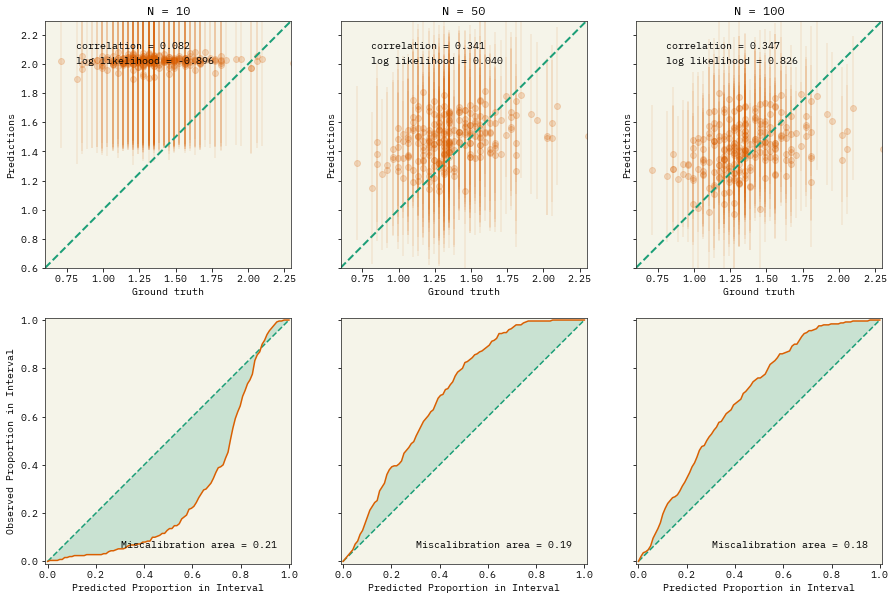

In [17]:
import matplotlib.pyplot as plt 
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import urllib.request
%matplotlib inline

#mpl.rcParams.update(mpl.rcParamsDefault)

urllib.request.urlretrieve('https://github.com/google/fonts/raw/main/ofl/ibmplexmono/IBMPlexMono-Regular.ttf', 'IBMPlexMono-Regular.ttf')
fe = font_manager.FontEntry(
    fname='IBMPlexMono-Regular.ttf',
    name='plexmono')
font_manager.fontManager.ttflist.append(fe)
plt.rcParams.update({'axes.facecolor':'#f5f4e9', 
            'grid.color' : '#AAAAAA', 
            'axes.edgecolor':'#333333', 
            'figure.facecolor':'#FFFFFF', 
            'axes.grid': False,
            'axes.prop_cycle':   plt.cycler('color', plt.cm.Dark2.colors),
            'font.family': fe.name,
            'figure.figsize': (6.6,6.6 / 1.2),
            'ytick.left': True,
            'xtick.bottom': True   
           })
#mpl.rcParams.update(mpl.rcParamsDefault)

fig, axs = plt.subplots(2, 3, figsize=(15, 10),sharey='row')
parity_plot(means10.flatten(), test_labels, stds10, axs[0, 0])
parity_plot(means50.flatten(), test_labels, stds50, axs[0, 1])
parity_plot(means100.flatten(), test_labels, stds100, axs[0, 2])
axs[0, 0].set_title('N = 10')
axs[0, 1].set_title('N = 50')
axs[0, 2].set_title('N = 100')
axs[0, 0].set_ylabel('Predictions')

make_plots(means10.flatten(), stds10, test_labels, axs[1, 0])
make_plots(means50.flatten(), stds50, test_labels, axs[1, 1])
make_plots(means100.flatten(), stds100, test_labels, axs[1, 2])
axs[1, 0].set_ylabel('Observed Proportion in Interval')



In [3]:
from celluloid import Camera
import matplotlib.pyplot as plt 
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import urllib.request

mpl.rcParams.update(mpl.rcParamsDefault)

urllib.request.urlretrieve('https://github.com/google/fonts/raw/main/ofl/ibmplexmono/IBMPlexMono-Regular.ttf', 'IBMPlexMono-Regular.ttf')
fe = font_manager.FontEntry(
    fname='IBMPlexMono-Regular.ttf',
    name='plexmono')
font_manager.fontManager.ttflist.append(fe)
plt.rcParams.update({'axes.facecolor':'#f5f4e9', 
            'grid.color' : '#AAAAAA', 
            'axes.edgecolor':'#333333', 
            'figure.facecolor':'#FFFFFF', 
            'axes.grid': False,
            'axes.prop_cycle':   plt.cycler('color', plt.cm.Dark2.colors),
            'font.family': fe.name,
            'figure.figsize': (6.6,6.6 / 1.2),
            'ytick.left': True,
            'xtick.bottom': True   
           })
fig = plt.figure()
camera = Camera(fig)
#fig, axs = plt.subplots(1)
for i in range(0, 100, 5):
    means, stds = get_results(jax.random.PRNGKey(0), params[29][i], test_reps)
    
    parity_plot2(means.flatten(), test_labels, stds)
    plt.text(
    0.7,
    1.8,
    "N = {0}".format(i),
    )
    camera.snap()
animation = camera.animate(interval = 1000, repeat = True,
                           repeat_delay = 500)
animation.save('parity.gif', writer = 'imagemagick', dpi=180)

NameError: name 'get_results' is not defined

In [14]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
def convert_ndarray(ls):
    out = []
    for l in ls:
        out.append(l)
    return np.array(out)
y = convert_ndarray(y)
pred_std_list = np.sqrt(std_list)
pred_mean_list = convert_ndarray(pred_list)

idx_counter = 0 


fig = make_plots(means.flatten(), stds, test_labels)




plt.show(fig)

NameError: name 'means' is not defined

<Figure size 640x480 with 0 Axes>

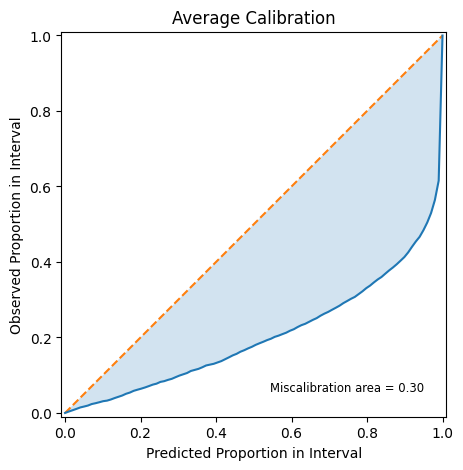

In [34]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
def convert_ndarray(ls):
    out = []
    for l in ls:
        out.append(l)
    return np.array(out)
y = convert_ndarray(y)
pred_std_list = np.sqrt(std_list)
pred_mean_list = convert_ndarray(pred_list)

idx_counter = 0       
fig = make_plots(pred_mean_list, pred_std_list, y)
plt.show(fig)

In [4]:
y_task1 = []
for i in range(50):
    with open('result_task1/labels_0414/y_{0}.pkl'.format(i), 'rb') as f:
        y_task1.append(current_best(pickle.load(f)[:50]))

In [18]:
import plotly.express as px 
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt 
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import urllib.request

mpl.rcParams.update(mpl.rcParamsDefault)

#fig = make_subplots(rows=1, cols=2)


seq_lens = []
def current_best_idx(ys):
    curr_best_idx = [0]
    curr_best = ys[0]
    for i, y in enumerate(ys):
        if i == 0:
            continue
        if y > curr_best:
            curr_best_idx.append(i)
            curr_best = y
    return curr_best_idx

#fig = px.line(df, x="year", y="lifeExp", title='Life expectancy in Canada')
#fig.show()
fig = go.Figure()

#print(seqlen)
y_task1 = []
y_task1_ohc = []
y_task1_grad = []
task1_idx = []
ohc_idx = []
grad_idx = []
for i in range(50):
    with open('./result_task1/labels_0617/y_{0}.pkl'.format(i), 'rb') as f:
        y = pickle.load(f)[:50]
        curr = current_best(y)
        curr_idx = current_best_idx(y)
        y_task1.append(curr)
        task1_idx.append(curr_idx)
        #fig.add_trace(go.Scatter(y=curr, line_width=4, line_color='#766991', opacity=0.1))
        
        #ax.plot(curr, alpha=0.2, color='lightskyblue', linewidth=5)
        
    
    number_str = str(i)
    text_i = number_str.zfill(1)
    with open('./result_task1/seqlen_0414/seq_{0}.pkl'.format(text_i), 'rb') as f1:
        seq_lens.append(pickle.load(f1)[:50])
    
    
    with open('./result_task1/labels_grad_0617/y_{0}.pkl'.format(i), 'rb') as f:
        y = pickle.load(f)[:50]
        curr = current_best(y)
        curr_idx = current_best_idx(y)
        y_task1_grad.append(curr)
        grad_idx.append(curr_idx)
        #fig.add_trace(go.Scatter(y=curr, line_width=8, line_color='#766991', opacity=0.1))
        
    with open('./result_task1/labels_ohc_0617/y_{0}.pkl'.format(i), 'rb') as f:
        y = pickle.load(f)[:50]
        curr = current_best(y)
        curr_idx = current_best_idx(y)
        y_task1_ohc.append(curr)
        ohc_idx.append(curr_idx)
        #fig.add_trace(go.Scatter(y=curr, line_width=8, line_color='#766991', opacity=0.1))
    
new_seqlen = []
for i in range(50):
    curr_len = seq_lens[i][0]
    smooth_len = []
    for idx, ele in enumerate(seq_lens[i]):
        if idx in task1_idx[i]:
            curr_len = ele
        smooth_len.append(curr_len)
    new_seqlen.append(smooth_len)
    
y_task1 = np.array(y_task1)
y_task1_ohc = np.array(y_task1_ohc)
y_task1_grad = np.array(y_task1_grad)
seqlen = jnp.mean(jnp.array(new_seqlen), axis=0)    
y_task1_median = np.median(y_task1, axis=0)
y_grad_median = np.median(y_task1_grad, axis=0)
y_ohc_median = np.median(y_task1_ohc, axis=0)
y_task1_max = np.max(y_task1, axis=0)
y_task1_min = np.min(y_task1, axis=0)
#fig.add_trace(go.Scatter(y=y_task1_median, line_color='#7570b3', line_width=4, opacity=1))
fig.add_trace(go.Scatter(name="UniRep/BO", y=y_task1_median, line_color='#1b9e77', line_width=4, opacity=0.8))
fig.add_hline(y=0.9886331, line_width=3, opacity=1, line_color='rgb(230, 131, 141)', line_dash="dash")

fig.add_trace(go.Scatter(name="UniRep/Gradient", y=y_grad_median, line_color='#d95f02', line_width=4, opacity=0.8))
fig.add_trace(go.Scatter(name="One-hot/BO", y=y_ohc_median, line_color='#7570b3', line_width=4, opacity=0.8))

fig.update_layout(
    #title="Hemolitic task",
    #paper_bgcolor="#f5f4e9",
    height=600/1.2,
    width=600,
    plot_bgcolor="#f5f4e9",
    xaxis_gridcolor="rgba(0, 0, 0, 0.1)",
    xaxis_title="Iterations",
    yaxis_gridcolor="rgba(0, 0, 0, 0.1)",
    yaxis_title="Hemolytic Score",
    showlegend=True,
    xaxis=dict(
    linecolor= 'black',
    linewidth= 1,
    mirror= True,
    ticks='outside'
    ),
  yaxis=dict(
    linecolor= 'black',
    linewidth= 1,
    mirror= True,
    ticks='outside'
  ),
    
    #title={
    #    'text': "Hemolytic task",
    #    'y':0.9,
    #    'x':0.5,
    #    'xanchor': 'center',
    #    'yanchor': 'top'},
    legend=dict(
        yanchor="top",
        y=0.3,
        xanchor="left",
        x=0.60,
        bgcolor = 'rgba(0,0,0,0.0)'
    ),
    font=dict(
        family="Courier New, monospace",
        size=15,
        color="Black",
    )
    )

fig.add_annotation(x=18, y=1,
            text="Highest score from positive data",
            showarrow=True,
            arrowhead=1)
fig.show(scale=2)
fig.write_image('hemo_all.png', scale=2.2)
fig.update_xaxes(rangemode="nonnegative")
fig.update_yaxes(rangemode="nonnegative")
#ax.text(1, 0.92, 'Highest score from Positive data', fontsize=10)
print(y_task1_median[-1])


0.94754857


In [19]:
new_seqlen_t = jnp.array(new_seqlen).T
half_seqlen = []
for i in range(50):
    if i % 4 == 0:
        half_seqlen.append(new_seqlen_t[i])
half_seqlen = jnp.array(half_seqlen)

In [48]:
!pip install -U kaleido

You should consider upgrading via the '/home/zyang43/.conda/envs/prettyB/bin/python -m pip install --upgrade pip' command.


In [20]:
from numpy.random import normal
from ridgeplot import ridgeplot
import pandas as pd
import plotly


# Not only does 'ridgeplot(...)' come configured with sensible defaults
# but is also fully configurable to your own style and preference!
fig = go.Figure()
fig = ridgeplot(
    samples=half_seqlen,
    bandwidth=2.5,
    kde_points=np.linspace(0, 40, 400),
    #colorscale="viridis",
    colorscale='gnbu',
    #colorscale='ylgnbu',
    colormode="index",
    coloralpha=0.3,
    labels=[i*4 for i in range(13)],
    spacing=2 / 9,
)
#fig.add_trace(fig1, row=1, col=2)

# Again, update the figure layout to your liking here
fig.update_layout(
    #title="Distribution of proposed sequence length",
    height=600/1.2,
    width=600,
    plot_bgcolor="#f5f4e9",
    xaxis_gridcolor="rgba(0, 0, 0, 0.1)",
    xaxis_title="Sequence length",
    yaxis_gridcolor="rgba(0, 0, 0, 0.1)",
    yaxis_title="Iterations",
    xaxis=dict(
    linecolor= 'black',
    linewidth= 1,
    mirror= False,
        ticks='outside'
    ),
  yaxis=dict(
    linecolor= 'black',
    linewidth= 1,
    mirror= False,
      ticks='outside'
  ),
    showlegend=False,
    #title={
    #    'text': "Distribution of proposed sequence length",
    #    'y':0.9,
    #    'x':0.5,
     #   'xanchor': 'center',
    #    'yanchor': 'top'},
    legend=dict(
        yanchor="top",
        y=0.25,
        xanchor="left",
        x=0.40
    ),
    font=dict(
        family="Courier New, monospace",
        size=16,
        color="Black",
    )
)
fig.write_image('seqlen.png', scale=2.2)
#plotly.io.write_image(fig, 'seqlen.png', scale=2.2)
fig.show(scale=2)

In [31]:
print(task1_idx)

[[0, 3, 7, 28, 47], [0, 2, 5, 7, 11, 17, 27, 47], [0, 2, 13, 35], [0, 1, 2, 8, 17], [0, 1, 5, 17], [0, 3, 4, 6, 7, 8, 26, 48], [0, 1, 2, 4], [0, 1, 2, 8], [0, 5, 13], [0, 2, 7, 18, 19, 38], [0, 4, 5, 6, 32], [0, 2, 3, 4, 13, 17, 18], [0, 1, 2, 7, 26, 27], [0, 1, 2, 3, 4, 7, 10, 19, 25, 30], [0, 1, 2, 48], [0, 1, 2, 13], [0, 5, 11, 33, 41], [0, 4, 5, 8, 13, 18], [0, 1, 3, 9, 10, 11], [0, 1, 2, 29, 31, 35], [0, 1, 2, 3, 17, 19, 23], [0, 2, 6, 11], [0, 1, 3, 5, 16, 19, 46], [0, 1, 10, 12, 13, 16, 19], [0, 7, 32], [0, 1, 2, 3, 7, 9, 21], [0, 1, 2, 8, 19, 34, 38, 42, 47], [0, 1, 2, 3, 5, 23, 46], [0, 3], [0, 3, 9, 36], [0, 1, 20, 40], [0, 2, 3, 17, 18, 26, 45], [0, 13, 16, 30, 33, 36], [0, 4, 8, 11, 12, 14, 15, 16, 45], [0, 1, 6, 7, 44, 49], [0, 1, 14], [0, 3, 7, 12, 15, 36], [0, 1, 3, 6, 8, 11, 31, 45], [0, 1, 2, 3, 4, 5, 6, 9], [0, 1, 5], [0, 1, 4, 17, 18, 29], [0, 1, 3, 4, 6, 12, 43, 46], [0, 2, 22, 31], [0, 1, 5, 7, 8, 21, 22], [0, 7, 43, 45], [0], [0, 2, 24], [0, 1, 3, 8, 15, 33, 39, 4

Text(0.5, 1.0, 'Distribution of generated sequence')

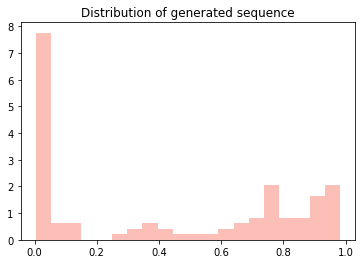

In [85]:
plt.hist(jnp.array(y_task1), bins=20, color='salmon', alpha=0.5, histtype='stepfilled', density=True)
plt.title('Distribution of generated sequence')

In [73]:
jnp.max(jnp.array(y_task1))

DeviceArray(0.98269045, dtype=float32)

In [86]:
import plotly.express as px
import plotly.graph_objects as go


key = jax.random.PRNGKey(0)
data=jax.random.normal(key, (13,20))
fig = px.imshow(np.abs(data), color_continuous_scale='Blues')
fig.update_layout(showlegend=False)
fig.update_xaxes(showticklabels=False, showgrid=True, gridwidth=10, gridcolor='LightPink')
fig.update_yaxes(showticklabels=False,  showgrid=True, gridwidth=1, gridcolor='LightPink')
fig.update_coloraxes(showscale=False)
for i in range(20):
    fig.add_vline(x= i + 0.5, line_width=4, line_color="white")
    
    if i > 12:
        continue
    fig.add_hline(y= i + 0.5, line_width=4, line_color="white")
    

fig.show()